# Import Libraries 

In [2]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import shutil  # Manage directories
import sys  # Read system parameters.

import keras  # Provide a frontend for TensorFlow.
import matplotlib as mpl  # Create 2D charts.
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import sklearn  # Perform data mining and analysis.
import tensorflow  # Train neural networks for deep learning.
from keras import datasets
from keras.layers import (
    ELU,
    Conv2D,
    Dense,
    Flatten,
    LeakyReLU,
    MaxPooling2D,
    PReLU,
    ThresholdedReLU,
)
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from numpy.random import seed
from sklearn.model_selection import train_test_split

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- TensorFlow {}".format(tensorflow.__version__))
print("- Keras {}\n".format(keras.__version__))

Libraries used in this project:
- Python 3.10.13 (main, Sep 11 2023, 08:21:04) [Clang 14.0.6 ]
- NumPy 1.26.4
- Matplotlib 3.9.2
- scikit-learn 1.5.1
- TensorFlow 2.10.0
- Keras 2.10.0



# Load the Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
print("Loaded {} fashion training records.".format(len(X_train.data)))
print("Loaded {} fashion test records.".format(len(X_test.data)))

Loaded 60000 fashion training records.
Loaded 10000 fashion test records.


**Spotlights** 

The Fashion-MNIST dataset was imported using Keras, which serves as a user-friendly interface for the TensorFlow deep learning library. It consists of numerical data that can be transformed into small grayscale images representing various clothing items. The training dataset comprised 60,000 records, while the test dataset included 10,000 records.

# Explore the Data

In [4]:
print("THe shape of the feature space is: {}\n".format(X_train[0].shape))

print("Some examples:\n")
print(X_train[6:9])

THe shape of the feature space is: (28, 28)

Some examples:

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]]


**Spotlights** 

- The structure of the feature space indicates that the training set is multi-dimensional; instead of having just 28 features, each image actually consists of 28 × 28 features, reflecting its dimensions of 28 pixels in width and 28 pixels in height.
- Features for example images 6, 7, and 8 are displayed, showing that while many values are truncated, the majority are 0, with a few having positive values. Each number signifies the intensity of a specific pixel in grayscale. Essentially, a value of 0 represents complete black, while 255 indicates complete white.
- This multi-dimensional representation allows for a more detailed analysis of the images, capturing the nuances of pixel intensity across the entire image space.

# Examine Class Names

In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

for i in range(10):
    print("{} ({})".format(class_names[i], np.unique(y_train)[i]))

T-shirt/top (0)
Trouser (1)
Pullover (2)
Dress (3)
Coat (4)
Sandal (5)
Shirt (6)
Sneaker (7)
Bag (8)
Ankle boot (9)


**Spotlights**

Each class label corresponds to its specific class name, which represents the type of clothing. In total, there are 10 distinct classes.

# Graph the Data Examples

The initial visualization will spotlight the last example in the dataset.

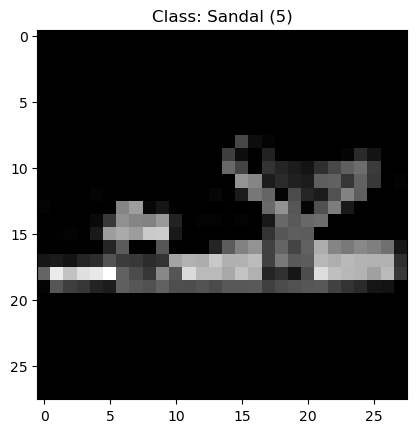

In [6]:
plt.imshow(X_train[-1], cmap="gray")
plt.title("Class: {} ({})".format(class_names[y_train[-1]], y_train[-1]));

**Spotlights** 

THe graph utilized the grayscale characteristics of the image to display the appearance of the last image in the training set. This particular image has been identified as a sandal  (5).

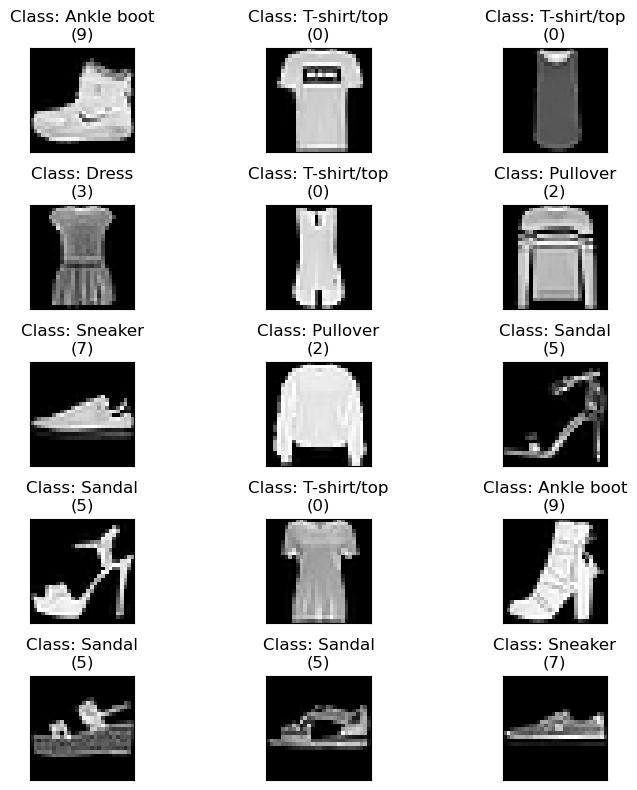

In [7]:
"""Generate the figure"""

figure, axes = plt.subplots(nrows=5, ncols=3, figsize=(8, 8))

"""Visualize the first 21 examples"""
for i, axis in zip(range(21), axes.flatten()):
    axis.imshow(X_train[i, :, :], cmap="gray")  # Plot training example.
    axis.title.set_text("Class: {}\n({})".format(class_names[y_train[i]], y_train[i]))

"""Disable axis ticks to enhance readability."""
for axis in axes.flatten():
    axis.set_xticks([])
    axis.set_yticks([])

figure.tight_layout()

**Spotlights** 

The initial 21 images from the training set are plotted.

## Organize the Data for Keras Training 

The ensuing steps will involve modifying the arrays to include a greyscale flag and applying one-hot encoding to the data for each label.

- The first and second lines modify the data into a Keras-compatible format. The first parameter (-1) instructs the function to maintain the total number of examples while reshaping, and the next two parameters ensure the 28 × 28 feature space remains intact. The final parameter (1) informs Keras that the images are grayscale.
- In lines 5 and 6, the to_categorical() function provides a straightforward method for one-hot encoding values with the help of the Keras library. This approach simplifies the data preparation process, making it easier to work with Keras for model training and evaluation.

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("One-hot encoding for first image: {}".format(y_train[0]))

One-hot encoding for first image: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Spotlights** 

Each sample image has been transformed into a one-hot encoded format, meaning that only one value is "activated" (set to 1) for each image based on its class. For instance, the first image shows a 1 in the last column, which signifies that it belongs to class 9, representing an ankle boot. Feel free to refer back to the images you viewed earlier to confirm this information.

# Partition the Dataset

Separate the training and validation datasets along with their corresponding labels. 
To create a validation holdout, the original training dataset will be divide. The initial test set loaded at the beginning will serve as the final test case.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=50)

print(f"Training features:         {X_train.shape}")
print(f"Validation features:       {X_val.shape}")
print(f"Training labels:           {y_train.shape}")
print(f"Validation labels:         {y_val.shape}")

Training features:         (45000, 28, 28, 1)
Validation features:       (15000, 28, 28, 1)
Training labels:           (45000, 10)
Validation labels:         (15000, 10)


# Create the architecture for the CNN.

In [10]:
"""Create the model as a series of layers"""

cnn = Sequential()

"""Begin by adding layers sequentially, one at a time."""
cnn.add(
    Conv2D(
        filters=32,
        kernel_size=(
            3,
            3,
        ),  # Introduce the first convolutional layer featuring 32 output filters and a filter size of 3x3.
        input_shape=(28, 28, 1),
        padding="same",
        activation="linear",
    )
)
"""Introduces a more complex activation function layer, specifically leaky ReLU"""
cnn.add(LeakyReLU(alpha=0.1))

"""Incorporates the first pooling layer following the convolution with 2x2 size."""
cnn.add(MaxPooling2D((2, 2), padding="same"))

"""continue the pattern by introducing two additional sets of convolutional and pooling layers"""
cnn.add(Conv2D(64, (3, 3), padding="same", activation="linear"))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2), padding="same"))

cnn.add(Conv2D(128, (3, 3), padding="same", activation="linear"))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2), padding="same"))

"""Establish a connection between the convolutional layer and the dense layer."""
cnn.add(Flatten())

"""Conclude with a dense output layer that utilizes softmax activation"""
cnn.add(Dense(10, activation="softmax"))  # Dense output layer with softmax activation.

print("The CNN structure has been built.")

The CNN structure has been built.


# Establish the Model

In [11]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

# Review the Model's Layers.

**Spotlights** 

This text offers a summary of the architecture of a Convolutional Neural Network (CNN). It details the type of each layer, the shape of its output, and the number of parameters associated with each convolution. The parameters are calculated using the formula: number of output filters multiplied by the sum of the product of input filters and filter size, plus one.

### Re-Imagine the Model's Layers

The accompanying code will create a more visual representation of the various layers within the CNN, making it easier to understand their configurations and relationships

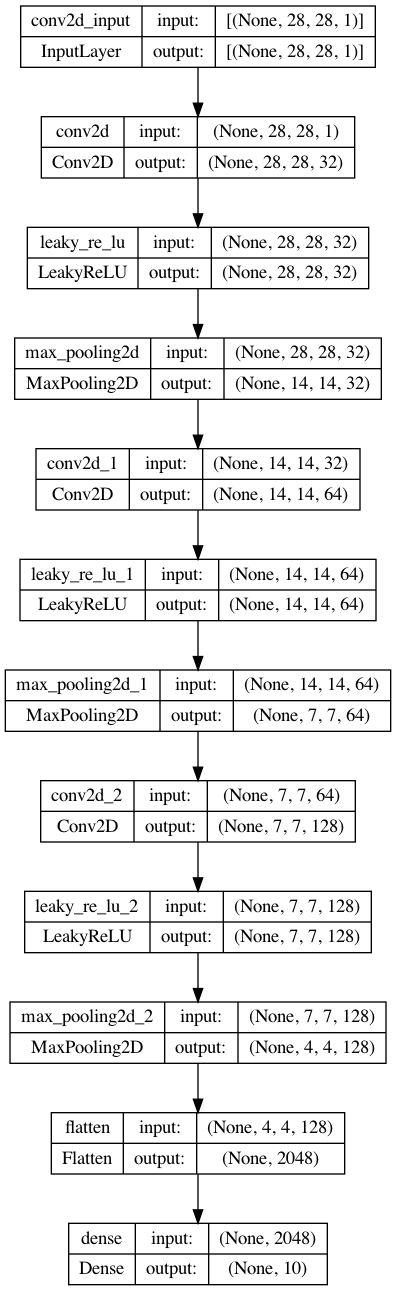

In [12]:
plot_model(cnn, show_shapes=True, to_file="model.png")

**Spotlights** 

 It's important to note that the dimensions of the input and output vary across the layers. As progress is made toward the final output layer, which is typically a dense network, the size of each layer tends to diminish.